# Ejemplo de datos con censura

Datos de consumo de gas LP, ¿cuánto Gas LP consumen los hogares en México?, ¿tiene sustitutos?

## 1. Importación de bibliotecas y datos:

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
GasLP_df = pd.read_stata('Gas_LP.dta')
GasLP_df

,folioviv,foliohog,ageb,est_dis,upm,factor,ubica_geo,entidad,cve_ent,Entidad,...,p_gasnat,lp_gasnat,lp_gasnat_kg,gasto_carb,gasto_lena,gasto_perol,gasto_diesel,gasto_comb,gasto_otroscomb,acc_gasnat
0,0202822602,1,689-3,017,0003860,544.0,020020001,Baja California,2.0,BAJA CALIFORNIA,...,245.769196,5.504393,2.498681,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2802005301,1,302-5,451,0068990,582.0,280220001,Tamaulipas,28.0,TAMAULIPAS,...,224.633987,5.414473,2.408761,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1000893202,1,398-4,140,0028020,295.0,100050001,Durango,10.0,DURANGO,...,304.743591,5.719471,2.713759,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0503695701,1,088-4,061,0013210,317.0,050350001,Coahuila de Zaragoza,5.0,COAHUILA DE ZARAGOZA,...,320.102020,5.768640,2.762928,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0801075702,1,299-9,118,0020230,530.0,080190001,Chihuahua,8.0,CHIHUAHUA,...,250.919601,5.525133,2.519421,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,0702164504,1,262-2,094,0018900,1035.0,071010001,Chiapas,7.0,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70307,1505068605,1,154-2,226,0037880,2870.0,150330001,MÃ©xico,15.0,MÃXICO,...,144.095200,4.970474,1.964762,0.0,0.0,0.0,0.0,255.0,0.0,1.0
70308,0660119614,1,021-9,093,0018300,23.0,060040015,Colima,6.0,COLIMA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70309,0704388512,1,003-6,109,0019280,646.0,071020012,Chiapas,7.0,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# SI LA INSTRUCCIÓN ANTERIOR NO FUNCIONA UTILICEN ESTA:
# Alternativamente:
GasLP_df = pd.read_csv('Gas_LP.csv')
GasLP_df

,folioviv,foliohog,ageb,est_dis,upm,factor,ubica_geo,entidad,cve_ent,Entidad,...,p_gasnat,lp_gasnat,lp_gasnat_kg,gasto_carb,gasto_lena,gasto_perol,gasto_diesel,gasto_comb,gasto_otroscomb,acc_gasnat
0,202822602,1,689-3,17,3860,544,20020001,Baja California,2,BAJA CALIFORNIA,...,245.7692,5.504393,2.498681,0.0,0.0,0.0,0.0,0.0,0,1
1,2802005301,1,302-5,451,68990,582,280220001,Tamaulipas,28,TAMAULIPAS,...,224.6340,5.414473,2.408761,0.0,0.0,0.0,0.0,0.0,0,1
2,1000893202,1,398-4,140,28020,295,100050001,Durango,10,DURANGO,...,304.7436,5.719471,2.713759,0.0,0.0,0.0,0.0,0.0,0,1
3,503695701,1,088-4,61,13210,317,50350001,Coahuila de Zaragoza,5,COAHUILA DE ZARAGOZA,...,320.1020,5.768640,2.762928,0.0,0.0,0.0,0.0,0.0,0,1
4,801075702,1,299-9,118,20230,530,80190001,Chihuahua,8,CHIHUAHUA,...,250.9196,5.525133,2.519421,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,702164504,1,262-2,94,18900,1035,71010001,Chiapas,7,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
70307,1505068605,1,154-2,226,37880,2870,150330001,México,15,MÉXICO,...,144.0952,4.970474,1.964762,0.0,0.0,0.0,0.0,255.0,0,1
70308,660119614,1,021-9,93,18300,23,60040015,Colima,6,COLIMA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0
70309,704388512,1,003-6,109,19280,646,71020012,Chiapas,7,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1


* folioviv: Identificador de la vivienda
* foliohog: Identificador del hogar
* ageb: Área geoestadísstica básica
* est_dis: Estrato de diseño muestral
* upm: Unidad primaria de muestreo
* factor: Factor de expansión
* ubica_geo: Ubicación geográfica
* entidad: Entidad
* cve_ent:               
* Entidad: Entidad
* cve_mun     
* nom_mun: nom_mun
* cve_loc: 
* lat_dec_loc: LAT_DEC
* lon_dec_loc: LON_DEC
* altitud: ALTITUD
* tam_loc: Tamaño de localidad
* rural: Rural=1 según folioviv
* tot_integ: Número de integrantes del hogar
* estufa: Tiene estufa en su casa
* calent_sol: Dispone de calentador solar de agua
* tanque_gas: Dispone de tanque de gas estacionario
* tenencia: Tipo de tenencia de la vivienda
* rentada: Vivienda rentada o prestada
* ing_cor: Ingreso corriente en miles
* ing_deciles: # de decil de ingreso
* ling_cor: Log del ingreso corriente mensual
* ling_cor2: Cuadrado del log del ingreso corriente mensual
* gasto_gaslp: Gasto en gas LP
* p_gaslp: Precio por kg del gas LP
* lgasto_gaslp: log de gasto en gas LP
* lp_gaslp: Log de precio por kg de gaslp
* gasto_elect: Gasto en electricdad
* p_elect: Precio en centavos por Kw/hr de la electricidad
* gasto_gasnat: Gasto en gas natural
* p_gasnat: Precio del gas natural en pesos por GJ
* lp_gasnat: Log del precio por GJ de gas natural
* lp_gasnat_kg: Log del precio por kg equivalnte del gas natural
* gasto_carb: Gasto en carbon
* gasto_lena: Gasto en legna
* gasto_perol: Gasto en petróleo en hogar
* gasto_diesel: Gasto en diesel
* gasto_comb: Gasto en combustible para calentar
* gasto_otroscomb: Gasto en otros combustibles
* acc_gasnat: Dummy, =1 si su localidad tiene acceso a gas natural, =0 si no

Fuente: ENIGH-2016 y otras fuentes del Gobierno Federal

## 2. Análisis descriptivo

¿El gasto en Gas LP es una variabe censurada?

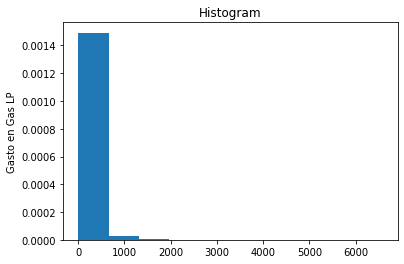

In [4]:
# plotting histogram in order to see
plt.hist(GasLP_df.gasto_gaslp, density = True, histtype='bar')

#plt.legend()
plt.ylabel('Gasto en Gas LP')
plt.title('Histogram')

plt.show()

In [5]:
# Selección de datos:
Gasto_Positivo = GasLP_df.loc[GasLP_df.gasto_gaslp >  0, :]
Gasto_Positivo

,folioviv,foliohog,ageb,est_dis,upm,factor,ubica_geo,entidad,cve_ent,Entidad,...,p_gasnat,lp_gasnat,lp_gasnat_kg,gasto_carb,gasto_lena,gasto_perol,gasto_diesel,gasto_comb,gasto_otroscomb,acc_gasnat
2,1000893202,1,398-4,140,28020,295,100050001,Durango,10,DURANGO,...,304.7436,5.719471,2.713759,0.0,0.0,0.0,0.0,0.0,0,1
6,502303605,1,273-8,54,12150,311,50300001,Coahuila de Zaragoza,5,COAHUILA DE ZARAGOZA,...,207.4196,5.334744,2.329032,0.0,0.0,0.0,0.0,0.0,0,1
7,2603514903,1,802-9,406,65880,500,260300001,Sonora,26,SONORA,...,240.5956,5.483118,2.477406,0.0,0.0,0.0,0.0,0.0,0,1
13,2603113806,1,664-3,406,65780,393,260300001,Sonora,26,SONORA,...,234.3780,5.456935,2.451223,0.0,0.0,0.0,0.0,0.0,0,1
14,100718604,1,216-A,2,780,192,10010001,Aguascalientes,1,AGUASCALIENTES,...,230.9560,5.442227,2.436515,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69948,860293516,1,018-7,132,23810,163,80160013,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0
69957,860885408,1,014-9,132,24070,209,80160001,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
69964,860885516,1,023-8,132,24070,209,80160001,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
70193,1461351612,1,011-5,223,37270,477,141250044,Jalisco,14,JALISCO,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0


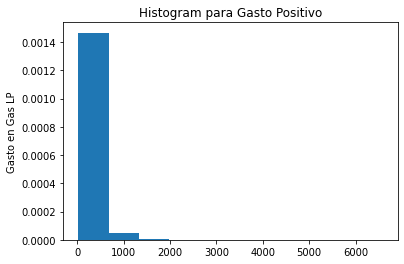

In [6]:
# plotting histogram in order to see
plt.hist(Gasto_Positivo.gasto_gaslp, density = True, histtype='bar')

#plt.legend()
plt.ylabel('Gasto en Gas LP')
plt.title('Histogram para Gasto Positivo')

plt.show()

In [7]:
# Selección de datos:
Gasto_Medio = GasLP_df.loc[(GasLP_df.gasto_gaslp >  0) & (GasLP_df.gasto_gaslp <  2000), :]
Gasto_Medio

,folioviv,foliohog,ageb,est_dis,upm,factor,ubica_geo,entidad,cve_ent,Entidad,...,p_gasnat,lp_gasnat,lp_gasnat_kg,gasto_carb,gasto_lena,gasto_perol,gasto_diesel,gasto_comb,gasto_otroscomb,acc_gasnat
2,1000893202,1,398-4,140,28020,295,100050001,Durango,10,DURANGO,...,304.7436,5.719471,2.713759,0.0,0.0,0.0,0.0,0.0,0,1
6,502303605,1,273-8,54,12150,311,50300001,Coahuila de Zaragoza,5,COAHUILA DE ZARAGOZA,...,207.4196,5.334744,2.329032,0.0,0.0,0.0,0.0,0.0,0,1
7,2603514903,1,802-9,406,65880,500,260300001,Sonora,26,SONORA,...,240.5956,5.483118,2.477406,0.0,0.0,0.0,0.0,0.0,0,1
13,2603113806,1,664-3,406,65780,393,260300001,Sonora,26,SONORA,...,234.3780,5.456935,2.451223,0.0,0.0,0.0,0.0,0.0,0,1
14,100718604,1,216-A,2,780,192,10010001,Aguascalientes,1,AGUASCALIENTES,...,230.9560,5.442227,2.436515,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69948,860293516,1,018-7,132,23810,163,80160013,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0
69957,860885408,1,014-9,132,24070,209,80160001,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
69964,860885516,1,023-8,132,24070,209,80160001,Chihuahua,8,CHIHUAHUA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
70193,1461351612,1,011-5,223,37270,477,141250044,Jalisco,14,JALISCO,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0


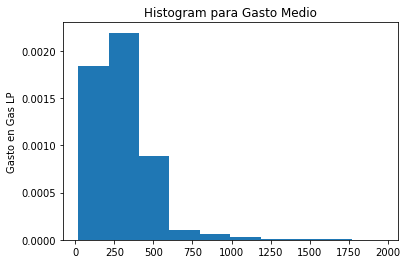

In [8]:
# plotting histogram in order to see
plt.hist(Gasto_Medio.gasto_gaslp, density = True, histtype='bar')

#plt.legend()
plt.ylabel('Gasto en Gas LP')
plt.title('Histogram para Gasto Medio')

plt.show()

In [9]:
# Selección de datos:
Gasto_Medio_2 = GasLP_df.loc[GasLP_df.gasto_gaslp <  500, :]
Gasto_Medio_2

,folioviv,foliohog,ageb,est_dis,upm,factor,ubica_geo,entidad,cve_ent,Entidad,...,p_gasnat,lp_gasnat,lp_gasnat_kg,gasto_carb,gasto_lena,gasto_perol,gasto_diesel,gasto_comb,gasto_otroscomb,acc_gasnat
0,202822602,1,689-3,17,3860,544,20020001,Baja California,2,BAJA CALIFORNIA,...,245.7692,5.504393,2.498681,0.0,0.0,0.0,0.0,0.0,0,1
1,2802005301,1,302-5,451,68990,582,280220001,Tamaulipas,28,TAMAULIPAS,...,224.6340,5.414473,2.408761,0.0,0.0,0.0,0.0,0.0,0,1
2,1000893202,1,398-4,140,28020,295,100050001,Durango,10,DURANGO,...,304.7436,5.719471,2.713759,0.0,0.0,0.0,0.0,0.0,0,1
3,503695701,1,088-4,61,13210,317,50350001,Coahuila de Zaragoza,5,COAHUILA DE ZARAGOZA,...,320.1020,5.768640,2.762928,0.0,0.0,0.0,0.0,0.0,0,1
4,801075702,1,299-9,118,20230,530,80190001,Chihuahua,8,CHIHUAHUA,...,250.9196,5.525133,2.519421,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,702164504,1,262-2,94,18900,1035,71010001,Chiapas,7,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1
70307,1505068605,1,154-2,226,37880,2870,150330001,México,15,MÉXICO,...,144.0952,4.970474,1.964762,0.0,0.0,0.0,0.0,255.0,0,1
70308,660119614,1,021-9,93,18300,23,60040015,Colima,6,COLIMA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0
70309,704388512,1,003-6,109,19280,646,71020012,Chiapas,7,CHIAPAS,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1


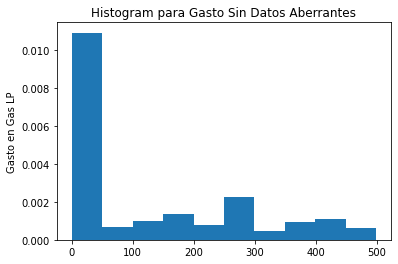

In [10]:
# plotting histogram in order to see
plt.hist(Gasto_Medio_2.gasto_gaslp, density = True, histtype='bar')

#plt.legend()
plt.ylabel('Gasto en Gas LP')
plt.title('Histogram para Gasto Sin Datos Aberrantes')

plt.show()

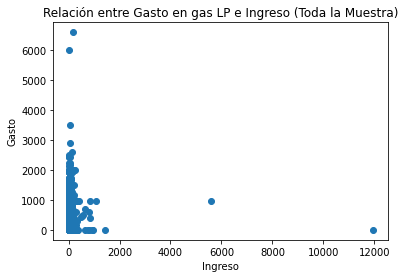

In [11]:
# Scatter Plot 1:
# Getting x and y values
y_values = GasLP_df['gasto_gaslp']
x_values = GasLP_df['ing_cor']

# Plot scatter plot
plt.scatter(x_values, y_values, marker = 'o')
#plt.grid()

plt.title('Relación entre Gasto en gas LP e Ingreso (Toda la Muestra)')
plt.ylabel('Gasto')
plt.xlabel('Ingreso')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

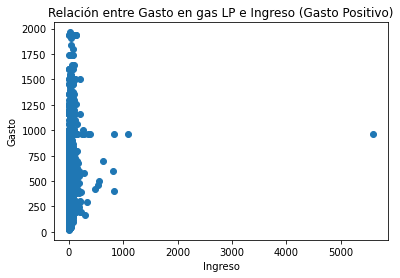

In [12]:
# Scatter Plot 2:
# Getting x and y values
y_values = Gasto_Medio['gasto_gaslp']
x_values = Gasto_Medio['ing_cor']

# Plot scatter plot
plt.scatter(x_values, y_values, marker = 'o')
#plt.grid()

plt.title('Relación entre Gasto en gas LP e Ingreso (Gasto Positivo)')
plt.ylabel('Gasto')
plt.xlabel('Ingreso')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

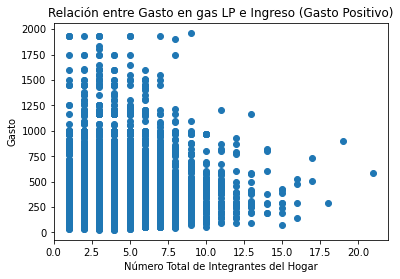

In [13]:
# Scatter Plot 3:
# Getting x and y values
y_values = Gasto_Medio['gasto_gaslp']
x_values = Gasto_Medio['tot_integ']

# Plot scatter plot
plt.scatter(x_values, y_values, marker = 'o')
#plt.grid()

plt.title('Relación entre Gasto en gas LP e Ingreso (Gasto Positivo)')
plt.ylabel('Gasto')
plt.xlabel('Número Total de Integrantes del Hogar')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()